In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [2]:
df = pd.read_csv('BRCA.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
# Check for missing values
print(df.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [6]:
# Fill missing numerical values with the mean  Impute Numerical Columns
# For numerical columns like Age and Protein levels, we can fill missing values with the mean (or median).
numerical_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [7]:
# Impute Categorical Columns
# For categorical columns like Gender, Tumour_Stage, etc., you can fill missing values with the mode (most frequent value).
# Fill missing categorical values with the mode
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
print(df.isnull().sum())

Patient_ID             7
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [9]:
#Date_of_Surgery: Since surgery date is critical, consider dropping rows where this is missing if feasible, 
#as it's necessary for time-related analysis.
# Drop rows where Date_of_Surgery is missing
df.dropna(subset=['Date_of_Surgery'], inplace=True)


In [10]:
#Date_of_Last_Visit: Impute missing values with a date indicating no further visits or a specific handling for missing dates.
# Impute missing Date_of_Last_Visit with a specific date or another appropriate strategy
df['Date_of_Last_Visit'].fillna('No Further Visit', inplace=True)


In [11]:
# Patient_Status
# Impute missing Patient_Status with a specific category or another appropriate strategy
df['Patient_Status'].fillna('Unknown', inplace=True)


In [13]:
# Check for missing Patient_ID values
missing_patient_ids = df[df['Patient_ID'].isnull()]

# If missing Patient_IDs are found and we decide to impute them with sequential IDs
if not missing_patient_ids.empty:
    df['Patient_ID'].fillna(value=pd.Series(range(1, len(missing_patient_ids) + 1)), inplace=True)


In [14]:
# Check for missing values again
print(df.isnull().sum())


Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64


In [18]:
# Convert date columns to datetime
#Handle missing values and non-date values in Date_of_Last_Visit
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y', errors='coerce')

# Replace any remaining non-date values with a specific placeholder or default date
df['Date_of_Last_Visit'].fillna('No Further Visit', inplace=True)  # Replace with a specific value if needed

# Print the first few rows to verify
print(df.head())




     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery   Date_of_Last_Visit  \
0  

In [20]:

# Convert date columns to datetime with errors='coerce' to handle non-date values
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y', errors='coerce')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y', errors='coerce')

# Replace NaT (Not a Time) values with a specific placeholder for non-date values
df['Date_of_Last_Visit'].fillna('No Further Visit', inplace=True)  # Replace with a specific value if needed


In [21]:
print(df.describe())

              Age    Protein1    Protein2    Protein3    Protein4  \
count  334.000000  334.000000  334.000000  334.000000  334.000000   
mean    58.886228   -0.029991    0.946896   -0.090204    0.009819   
min     29.000000   -2.340900   -0.978730   -1.627400   -2.025500   
25%     49.000000   -0.358888    0.362173   -0.513748   -0.377090   
50%     58.000000    0.006129    0.992805   -0.173180    0.041768   
75%     68.000000    0.343598    1.627900    0.278353    0.425630   
max     90.000000    1.593600    3.402200    2.193400    1.629900   
std     12.961212    0.563588    0.911637    0.585175    0.629055   

                     Date_of_Surgery  
count                            334  
mean   2018-09-08 00:38:48.143712512  
min              2017-01-15 00:00:00  
25%              2018-03-11 00:00:00  
50%              2018-10-05 00:00:00  
75%              2019-04-04 00:00:00  
max              2019-11-21 00:00:00  
std                              NaN  


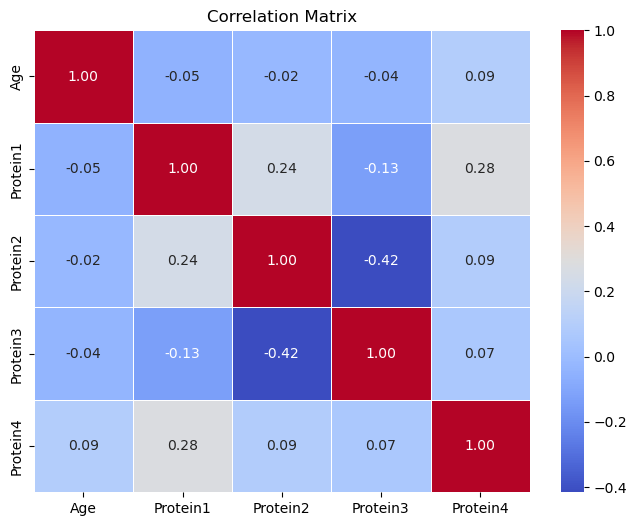

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing relevant columns
# Select numerical columns for correlation analysis
numerical_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


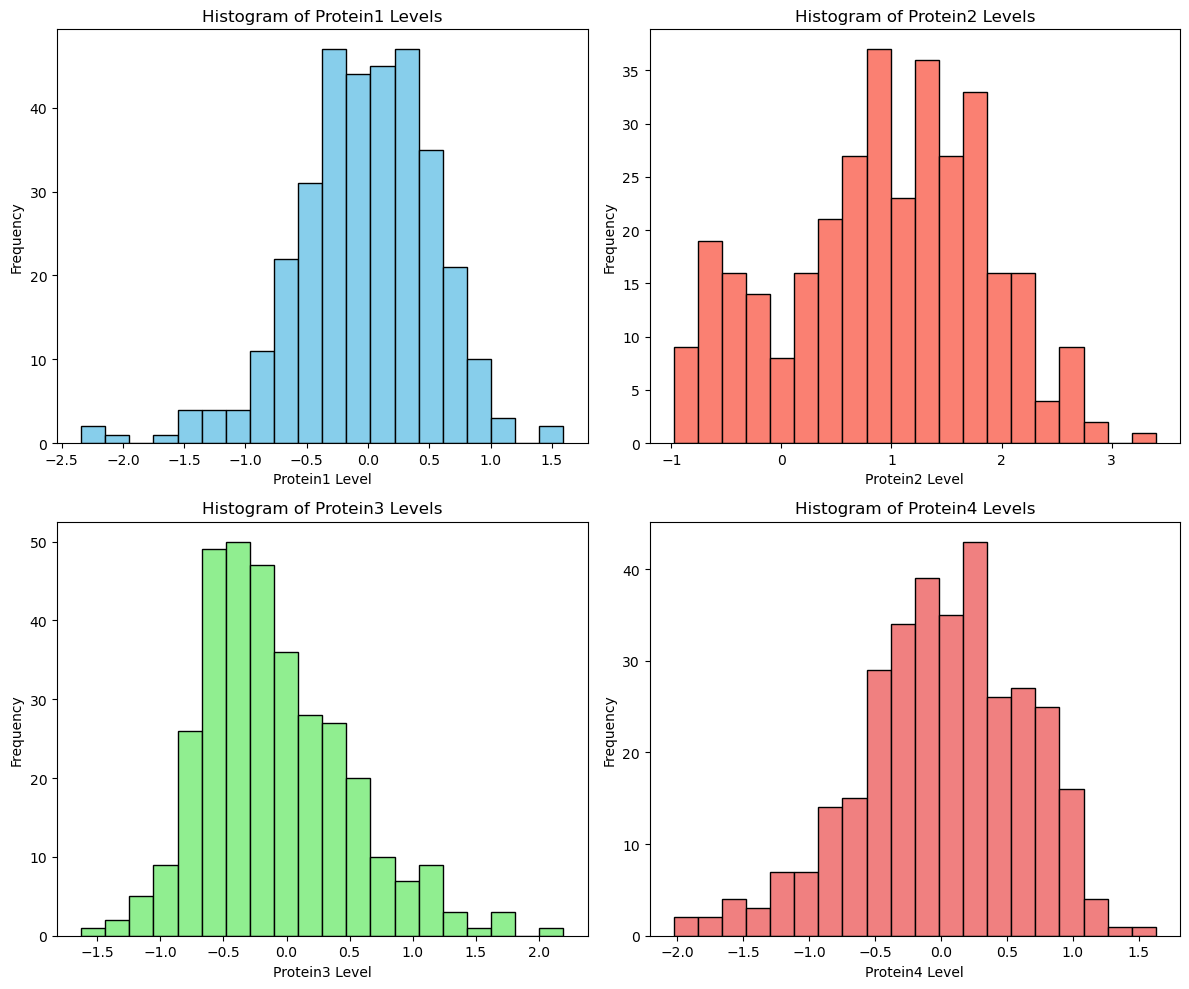

In [25]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each protein level
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each protein level
axs[0, 0].hist(df['Protein1'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Protein1 Levels')
axs[0, 0].set_xlabel('Protein1 Level')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['Protein2'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('Histogram of Protein2 Levels')
axs[0, 1].set_xlabel('Protein2 Level')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['Protein3'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Histogram of Protein3 Levels')
axs[1, 0].set_xlabel('Protein3 Level')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Protein4'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 1].set_title('Histogram of Protein4 Levels')
axs[1, 1].set_xlabel('Protein4 Level')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




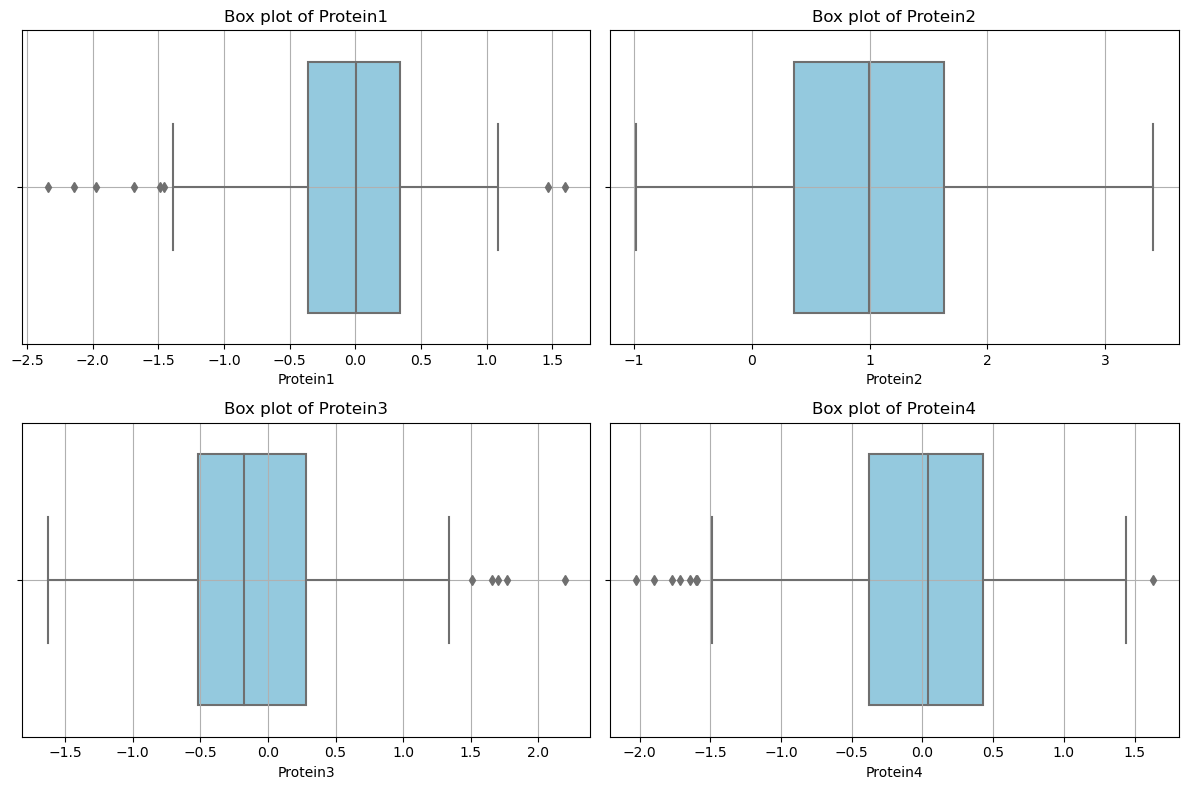

In [26]:
# Define the protein columns
#To create box plots for all protein levels in our 
#dataset and visually check for outliers beyond 1.5 times the interquartile range (IQR)
protein_columns = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

# Create subplots for each protein level
plt.figure(figsize=(12, 8))
for i, column in enumerate(protein_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [27]:

# Descriptive statistics for Protein2 levels
print(df['Protein2'].describe())

# Descriptive statistics for age
print(df['Age'].describe())

# Summary statistics by gender
print(df.groupby('Gender')['Protein2'].describe())

count    334.000000
mean       0.946896
std        0.911637
min       -0.978730
25%        0.362173
50%        0.992805
75%        1.627900
max        3.402200
Name: Protein2, dtype: float64
count    334.000000
mean      58.886228
std       12.961212
min       29.000000
25%       49.000000
50%       58.000000
75%       68.000000
max       90.000000
Name: Age, dtype: float64
        count      mean       std      min       25%       50%     75%     max
Gender                                                                        
FEMALE  330.0  0.946825  0.915414 -0.97873  0.351760  0.992805  1.6279  3.4022
MALE      4.0  0.952805  0.592585  0.46900  0.497065  0.809060  1.2648  1.7241


In [32]:
# Calculate quartiles and IQR for Protein1
Q1_protein1 = df['Protein1'].quantile(0.25)
Q3_protein1 = df['Protein1'].quantile(0.75)
IQR_protein1 = Q3_protein1 - Q1_protein1

print('Q1:', Q1_protein1)
print('Q3:', Q3_protein1)
print('IQR:', IQR_protein1)





Q1: -0.3588875
Q3: 0.3435975
IQR: 0.702485


In [30]:
# Define outliers for Protein1 using IQR method
outliers_protein1 = df[(df['Protein1'] < Q1_protein1 - 1.5 * IQR_protein1) | (df['Protein1'] > Q3_protein1 + 1.5 * IQR_protein1)]

# Print outliers for Protein1
print("Outliers in Protein1:")
print(outliers_protein1)

Outliers in Protein1:
       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
13   TCGA-A2-A0ES  52.0  FEMALE   -1.6828   0.72722  0.056773  -1.24410   
50   TCGA-A8-A093  61.0  FEMALE   -1.4872   0.34903 -0.662420   0.18528   
85   TCGA-A8-A09Q  83.0  FEMALE   -2.1446  -0.17946 -0.200330  -1.48880   
93   TCGA-E2-A14Q  50.0  FEMALE    1.5936   1.67520 -0.038062   0.94426   
125  TCGA-A8-A09M  75.0  FEMALE   -1.9711  -0.63197  0.037134  -0.46685   
182  TCGA-C8-A1HI  40.0  FEMALE   -1.4553  -0.74177  1.133600  -0.83970   
271  TCGA-AR-A1AV  68.0    MALE    1.4704   0.46900  0.135540  -0.28984   
285  TCGA-AC-A5EI  88.0  FEMALE   -2.3409   0.37246  0.208450  -1.64110   

    Tumour_Stage                       Histology ER status PR status  \
13            II   Infiltrating Ductal Carcinoma  Positive  Positive   
50            II   Infiltrating Ductal Carcinoma  Positive  Positive   
85           III   Infiltrating Ductal Carcinoma  Positive  Positive   
93            

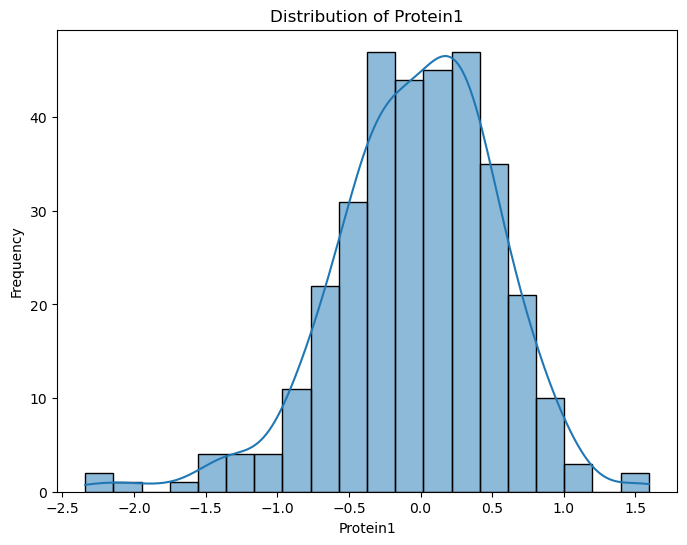

Demographic and Clinical Characteristics of Outliers in Protein1:
     Patient_ID  Age_x Gender_x Tumour_Stage_x  Protein1_x
0  TCGA-A2-A0ES   52.0   FEMALE             II     -1.6828
1  TCGA-A8-A093   61.0   FEMALE             II     -1.4872
2  TCGA-A8-A09Q   83.0   FEMALE            III     -2.1446
3  TCGA-E2-A14Q   50.0   FEMALE             II      1.5936
4  TCGA-A8-A09M   75.0   FEMALE            III     -1.9711
5  TCGA-C8-A1HI   40.0   FEMALE            III     -1.4553
6  TCGA-AR-A1AV   68.0     MALE             II      1.4704
7  TCGA-AC-A5EI   88.0   FEMALE              I     -2.3409


In [46]:

# Plot histogram of Protein1
plt.figure(figsize=(8, 6))
sns.histplot(df['Protein1'], kde=True)
plt.title('Distribution of Protein1')
plt.xlabel('Protein1')
plt.ylabel('Frequency')
plt.show()

# Investigate characteristics of outliers in Protein1
outliers_info_protein1 = pd.merge(outliers_protein1, df, on='Patient_ID', how='left')
print("Demographic and Clinical Characteristics of Outliers in Protein1:")
print(outliers_info_protein1[['Patient_ID', 'Age_x', 'Gender_x', 'Tumour_Stage_x', 'Protein1_x']])


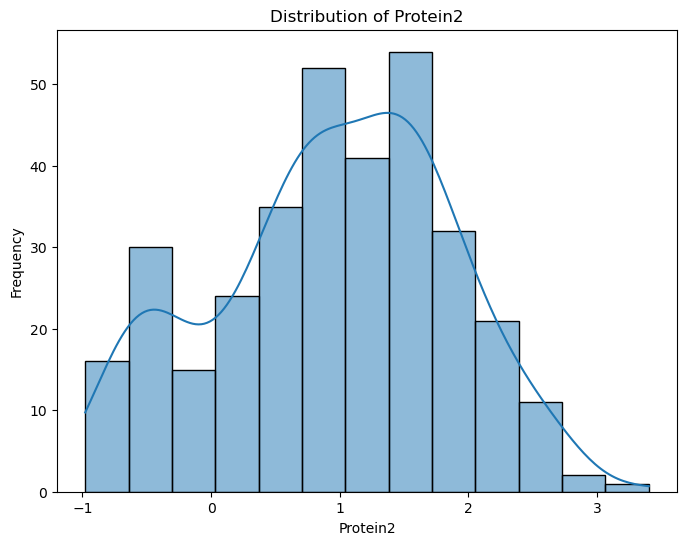

NameError: name 'outliers_protein2' is not defined

In [48]:

# Plot histogram of Protein1
plt.figure(figsize=(8, 6))
sns.histplot(df['Protein2'], kde=True)
plt.title('Distribution of Protein2')
plt.xlabel('Protein2')
plt.ylabel('Frequency')
plt.show()

# Investigate characteristics of outliers in Protein1
outliers_info_protein2 = pd.merge(outliers_protein2, df, on='Patient_ID', how='left')
print("Demographic and Clinical Characteristics of Outliers in Protein1:")
print(outliers_info_protein1[['Patient_ID', 'Age_x', 'Gender_x', 'Tumour_Stage_x', 'Protein2_x']])



In [52]:
protein_columns = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

# Calculate quartiles and IQR for each protein column
for protein_col in protein_columns:
    Q1 = df[protein_col].quantile(0.25)
    Q3 = df[protein_col].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f'For {protein_col}:')
    print('Q1:', Q1)
    print('Q3:', Q3)
    print('IQR:', IQR)
    print()

# Define a function to filter outliers based on IQR
def filter_outliers(df, col_name, iqr_factor=1.5):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter condition
    filter_condition = (df[col_name] < Q1 - iqr_factor * IQR) | (df[col_name] > Q3 + iqr_factor * IQR)
    
    return df[filter_condition]

For Protein1:
Q1: -0.3588875
Q3: 0.3435975
IQR: 0.702485

For Protein2:
Q1: 0.3621725
Q3: 1.6279
IQR: 1.2657275

For Protein3:
Q1: -0.5137475
Q3: 0.2783525
IQR: 0.7921

For Protein4:
Q1: -0.37709000000000004
Q3: 0.42563
IQR: 0.8027200000000001



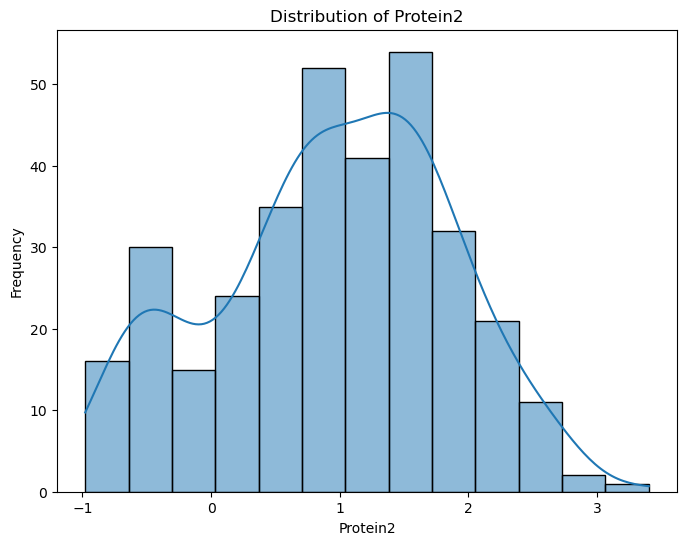

Demographic and Clinical Characteristics of Outliers in Protein1:
     Patient_ID  Age_x Gender_x Tumour_Stage_x  Protein2_x
0  TCGA-A2-A0ES   52.0   FEMALE             II     0.72722
1  TCGA-A8-A093   61.0   FEMALE             II     0.34903
2  TCGA-A8-A09Q   83.0   FEMALE            III    -0.17946
3  TCGA-E2-A14Q   50.0   FEMALE             II     1.67520
4  TCGA-A8-A09M   75.0   FEMALE            III    -0.63197
5  TCGA-C8-A1HI   40.0   FEMALE            III    -0.74177
6  TCGA-AR-A1AV   68.0     MALE             II     0.46900
7  TCGA-AC-A5EI   88.0   FEMALE              I     0.37246


In [53]:
# Apply the filter to each protein column
outliers_protein2 = filter_outliers(df, 'Protein2')

# Plot histogram of Protein1
plt.figure(figsize=(8, 6))
sns.histplot(df['Protein2'], kde=True)
plt.title('Distribution of Protein2')
plt.xlabel('Protein2')
plt.ylabel('Frequency')
plt.show()

# Investigate characteristics of outliers in Protein1
outliers_info_protein2 = pd.merge(outliers_protein2, df, on='Patient_ID', how='left')
print("Demographic and Clinical Characteristics of Outliers in Protein1:")
print(outliers_info_protein1[['Patient_ID', 'Age_x', 'Gender_x', 'Tumour_Stage_x', 'Protein2_x']])

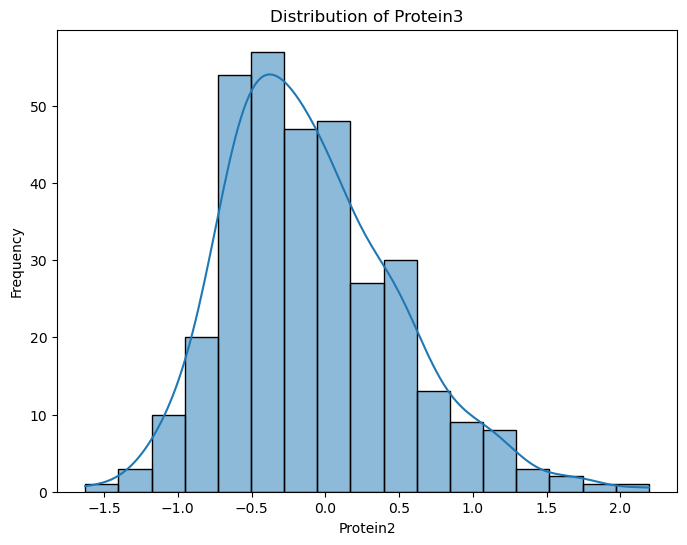

Demographic and Clinical Characteristics of Outliers in Protein3:
Empty DataFrame
Columns: [Patient_ID, Age_x, Gender_x, Tumour_Stage_x, Protein3_x]
Index: []


In [54]:
# Apply the filter to each protein column
outliers_protein3 = filter_outliers(df, 'Protein3')

# Plot histogram of Protein1
plt.figure(figsize=(8, 6))
sns.histplot(df['Protein3'], kde=True)
plt.title('Distribution of Protein3')
plt.xlabel('Protein2')
plt.ylabel('Frequency')
plt.show()

# Investigate characteristics of outliers in Protein1
outliers_info_protein3 = pd.merge(outliers_protein2, df, on='Patient_ID', how='left')
print("Demographic and Clinical Characteristics of Outliers in Protein3:")
print(outliers_info_protein3[['Patient_ID', 'Age_x', 'Gender_x', 'Tumour_Stage_x', 'Protein3_x']])

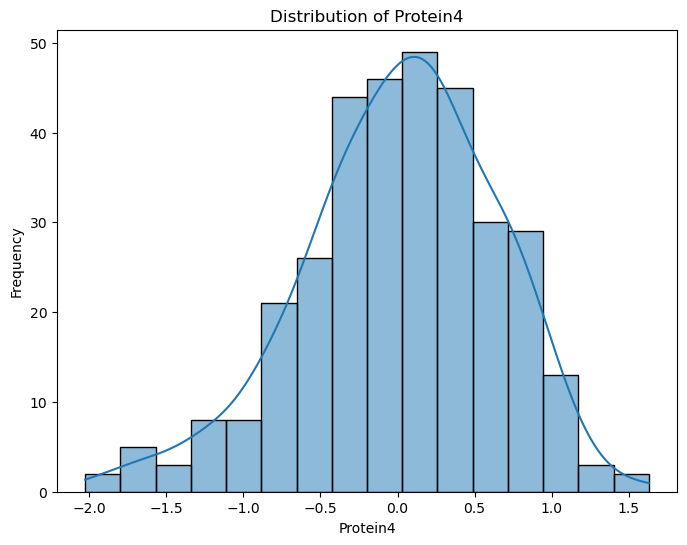

Demographic and Clinical Characteristics of Outliers in Protein3:
     Patient_ID  Age_x Gender_x Tumour_Stage_x  Protein4_x
0  TCGA-AC-A62Y   79.0   FEMALE             II      1.6299
1  TCGA-B6-A40C   51.0   FEMALE             II     -2.0255
2  TCGA-BH-A0B1   66.0   FEMALE             II     -1.7684
3  TCGA-EW-A1PE   56.0   FEMALE             II     -1.8993
4  TCGA-A8-A092   48.0   FEMALE            III     -1.6028
5  TCGA-BH-A0HQ   56.0   FEMALE             II     -1.5965
6  TCGA-BH-A0DT   41.0   FEMALE             II     -1.7127
7  TCGA-AC-A5EI   88.0   FEMALE              I     -1.6411


In [55]:
# Apply the filter to each protein column
outliers_protein4 = filter_outliers(df, 'Protein4')

# Plot histogram of Protein1
plt.figure(figsize=(8, 6))
sns.histplot(df['Protein4'], kde=True)
plt.title('Distribution of Protein4')
plt.xlabel('Protein4')
plt.ylabel('Frequency')
plt.show()

# Investigate characteristics of outliers in Protein1
outliers_info_protein4 = pd.merge(outliers_protein4, df, on='Patient_ID', how='left')
print("Demographic and Clinical Characteristics of Outliers in Protein3:")
print(outliers_info_protein4[['Patient_ID', 'Age_x', 'Gender_x', 'Tumour_Stage_x', 'Protein4_x']])


In [56]:
def analyze_outliers(outliers_info, protein_name):
    print(f"\nAnalyzing Outliers for {protein_name}:")
    print("Number of Outliers:", len(outliers_info))
    
    # Age distribution
    print("\nAge Distribution:")
    print(outliers_info['Age_x'].describe())
    
    # Gender distribution
    print("\nGender Distribution:")
    print(outliers_info['Gender_x'].value_counts())
    
    # Tumor stage distribution
    print("\nTumor Stage Distribution:")
    print(outliers_info['Tumour_Stage_x'].value_counts())
    
    # Histology distribution
    print("\nHistology Distribution:")
    print(outliers_info['Histology_x'].value_counts())
    
    # ER status distribution
    print("\nER Status Distribution:")
    print(outliers_info['ER status_x'].value_counts())
    
    # PR status distribution
    print("\nPR Status Distribution:")
    print(outliers_info['PR status_x'].value_counts())
    
    # HER2 status distribution
    print("\nHER2 Status Distribution:")
    print(outliers_info['HER2 status_x'].value_counts())
    
    # Surgery type distribution
    print("\nSurgery Type Distribution:")
    print(outliers_info['Surgery_type_x'].value_counts())



In [61]:
# Apply analyze_outliers function for each protein
analyze_outliers(outliers_info_protein1, "Protein1")





Analyzing Outliers for Protein1:
Number of Outliers: 8

Age Distribution:
count     8.000000
mean     64.625000
std      16.885645
min      40.000000
25%      51.500000
50%      64.500000
75%      77.000000
max      88.000000
Name: Age_x, dtype: float64

Gender Distribution:
Gender_x
FEMALE    7
MALE      1
Name: count, dtype: int64

Tumor Stage Distribution:
Tumour_Stage_x
II     4
III    3
I      1
Name: count, dtype: int64

Histology Distribution:
Histology_x
Infiltrating Ductal Carcinoma     7
Infiltrating Lobular Carcinoma    1
Name: count, dtype: int64

ER Status Distribution:
ER status_x
Positive    8
Name: count, dtype: int64

PR Status Distribution:
PR status_x
Positive    8
Name: count, dtype: int64

HER2 Status Distribution:
HER2 status_x
Negative    7
Positive    1
Name: count, dtype: int64

Surgery Type Distribution:
Surgery_type_x
Other                          4
Simple Mastectomy              2
Lumpectomy                     1
Modified Radical Mastectomy    1
Name: coun

In [58]:
analyze_outliers(outliers_info_protein2, "Protein2")


Analyzing Outliers for Protein2:
Number of Outliers: 0

Age Distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age_x, dtype: float64

Gender Distribution:
Series([], Name: count, dtype: int64)

Tumor Stage Distribution:
Series([], Name: count, dtype: int64)

Histology Distribution:
Series([], Name: count, dtype: int64)

ER Status Distribution:
Series([], Name: count, dtype: int64)

PR Status Distribution:
Series([], Name: count, dtype: int64)

HER2 Status Distribution:
Series([], Name: count, dtype: int64)

Surgery Type Distribution:
Series([], Name: count, dtype: int64)


In [59]:
analyze_outliers(outliers_info_protein3, "Protein3")


Analyzing Outliers for Protein3:
Number of Outliers: 0

Age Distribution:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age_x, dtype: float64

Gender Distribution:
Series([], Name: count, dtype: int64)

Tumor Stage Distribution:
Series([], Name: count, dtype: int64)

Histology Distribution:
Series([], Name: count, dtype: int64)

ER Status Distribution:
Series([], Name: count, dtype: int64)

PR Status Distribution:
Series([], Name: count, dtype: int64)

HER2 Status Distribution:
Series([], Name: count, dtype: int64)

Surgery Type Distribution:
Series([], Name: count, dtype: int64)


In [60]:
analyze_outliers(outliers_info_protein4, "Protein4")



Analyzing Outliers for Protein4:
Number of Outliers: 8

Age Distribution:
count     8.00000
mean     60.62500
std      16.01729
min      41.00000
25%      50.25000
50%      56.00000
75%      69.25000
max      88.00000
Name: Age_x, dtype: float64

Gender Distribution:
Gender_x
FEMALE    8
Name: count, dtype: int64

Tumor Stage Distribution:
Tumour_Stage_x
II     6
III    1
I      1
Name: count, dtype: int64

Histology Distribution:
Histology_x
Infiltrating Ductal Carcinoma     5
Mucinous Carcinoma                2
Infiltrating Lobular Carcinoma    1
Name: count, dtype: int64

ER Status Distribution:
ER status_x
Positive    8
Name: count, dtype: int64

PR Status Distribution:
PR status_x
Positive    8
Name: count, dtype: int64

HER2 Status Distribution:
HER2 status_x
Negative    7
Positive    1
Name: count, dtype: int64

Surgery Type Distribution:
Surgery_type_x
Other                          3
Modified Radical Mastectomy    2
Simple Mastectomy              2
Lumpectomy                 

In [71]:

# Example: ANOVA on Protein1 by Tumour_Stage_x
# Group by Tumour_Stage_x and calculate mean protein levels
groups = [df[df['Tumour_Stage'] == stage]['Protein1'] for stage in df['Tumour_Stage'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print results
print("ANOVA Results:")
print(f"  F-statistic: {f_statistic}")
print(f"  p-value: {p_value}")

# Interpret p-value
alpha = 0.05
if p_value < alpha:
    print("  Conclusion: Reject null hypothesis; there are significant differences in Protein1 levels across different tumor stages.")
else:
    print("  Conclusion: Fail to reject null hypothesis; there are no significant differences in Protein1 levels across different tumor stages.")


ANOVA Results:
  F-statistic: 0.6965046321451275
  p-value: 0.4990529304500595
  Conclusion: Fail to reject null hypothesis; there are no significant differences in Protein1 levels across different tumor stages.
